# 문제_1번

In [46]:
import pandas as pd
import matplotlib as rc
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.font_manager as fm
from prophet import Prophet
import numpy as np

In [2]:
file_path="./ref/출입국항구내외국인성별국제이동연간_20250305.csv"
ori=pd.read_csv(file_path, encoding="EUC-KR")
ori.head()

,출입국항별,내외국인별,성별,시점,항목,데이터
0,인천공항,내국인,남자,2001,입국자,70444
1,인천공항,내국인,남자,2001,출국자,96551
2,인천공항,내국인,남자,2002,입국자,101032
3,인천공항,내국인,남자,2002,출국자,124319
4,인천공항,내국인,남자,2003,입국자,102093


In [3]:
ex1_data = ori.copy()
ex1_data.columns =["Airport","type1","gender","year","type2","value"]
# ex1_data.rename(columns={"",""})
ex1_data

,Airport,type1,gender,year,type2,value
0,인천공항,내국인,남자,2001,입국자,70444
1,인천공항,내국인,남자,2001,출국자,96551
2,인천공항,내국인,남자,2002,입국자,101032
3,인천공항,내국인,남자,2002,출국자,124319
4,인천공항,내국인,남자,2003,입국자,102093
...,...,...,...,...,...,...
179,인천공항,외국인,여자,2021,출국자,112458
180,인천공항,외국인,여자,2022,입국자,172332
181,인천공항,외국인,여자,2022,출국자,106797
182,인천공항,외국인,여자,2023,입국자,181388


In [4]:
filter1 = ex1_data['type1']=='외국인'
ex2_data=ex1_data[filter1].copy()
ex3_data=ex1_data[filter1].copy()
# ex1_data[filter1]

In [5]:
ex1_data=ex1_data.groupby('year')['value'].sum().reset_index(name='total') #year를 기준으로 합하는데['value']를 기점으로 
ex1_data

,year,total
0,2001,521210
1,2002,697631
2,2003,747272
3,2004,769912
4,2005,991717
5,2006,996275
6,2007,1012415
7,2008,1080247
8,2009,1009778
9,2010,1019086


In [6]:
filter2=ex2_data['type2']=='입국자'
ex2_filtered = ex2_data[filter2]
filter3=ex2_data['type2']=='출국자'
ex3_filtered=ex2_data[filter3]
ex2_data=ex2_filtered[filter2].groupby('year')['value'].sum().reset_index(name='total')
ex3_data=ex3_filtered[filter3].groupby('year')['value'].sum().reset_index(name='total')
ex3_data

C:\Users\Admin\AppData\Local\Temp\ipykernel_22384\2667119119.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ex2_data=ex2_filtered[filter2].groupby('year')['value'].sum().reset_index(name='total')
C:\Users\Admin\AppData\Local\Temp\ipykernel_22384\2667119119.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ex3_data=ex3_filtered[filter3].groupby('year')['value'].sum().reset_index(name='total')


,year,total
0,2001,72896
1,2002,97493
2,2003,134088
3,2004,123698
4,2005,229675
5,2006,145644
6,2007,127230
7,2008,174604
8,2009,201288
9,2010,163777


Text(0.3, 0.3, '한글')

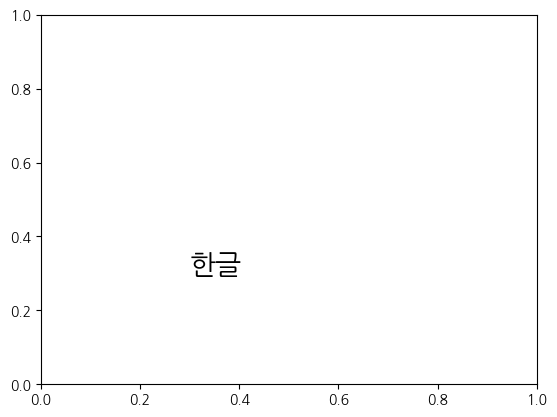

In [7]:
# 윈도우용 폰트  경로 설정
path= "C:\\Windows\\Fonts\\NanumGothic.ttf"
font_name = fm.FontProperties(fname=path).get_name()
rc('font',family=font_name)
plt.text(0.3,0.3,'한글', size=20)

<Axes: title={'center': '2)_2001~2023 인천공항 외국인 출국 차트'}>

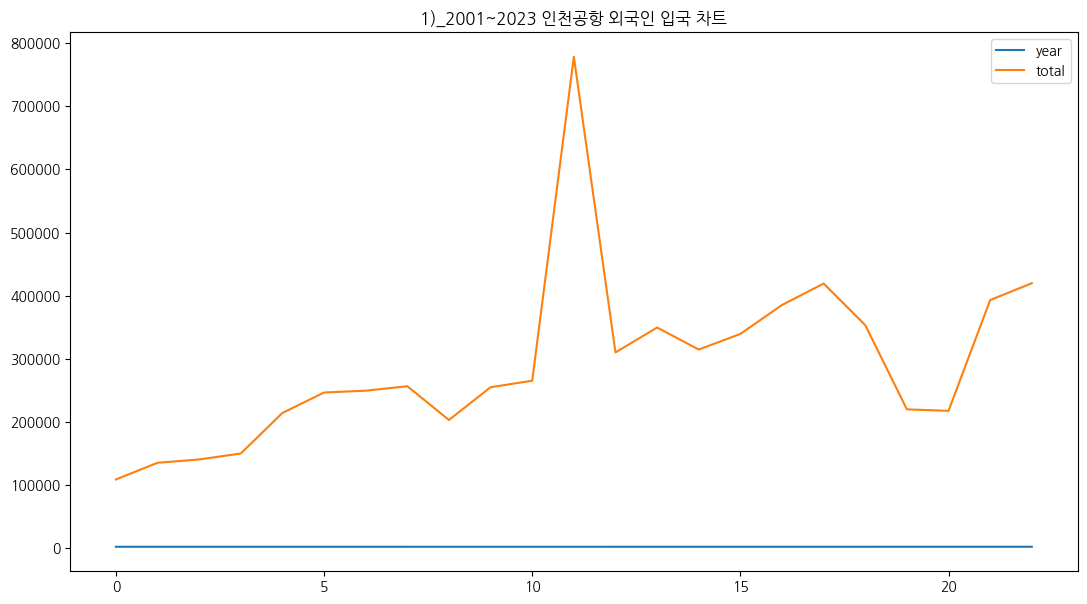

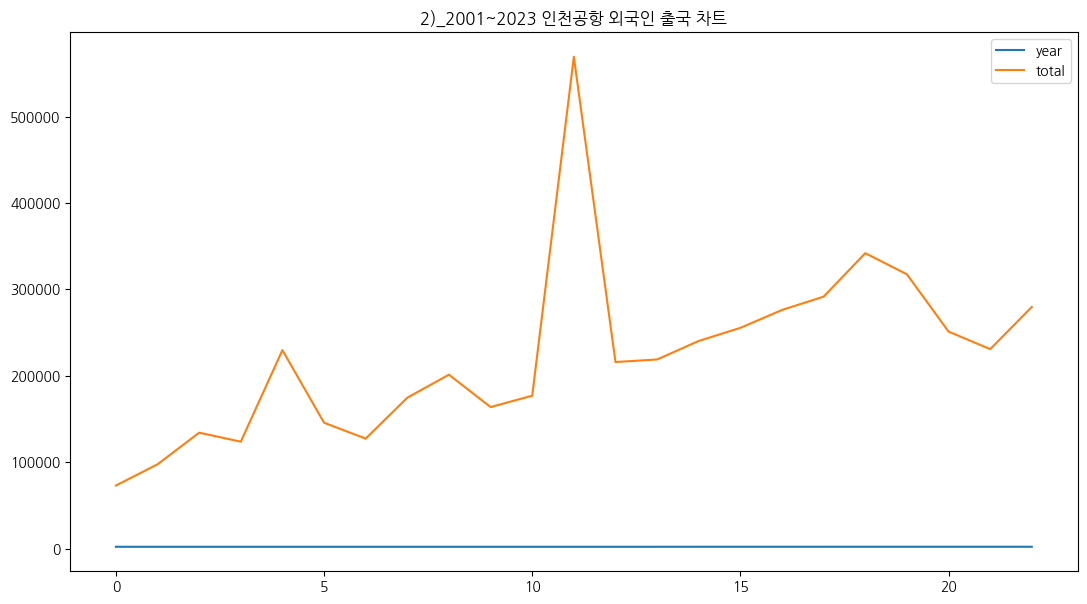

In [11]:
ex2_data.plot(figsize=(13,7),title="1)_2001~2023 인천공항 외국인 입국 차트")
ex3_data.plot(figsize=(13,7),title="2)_2001~2023 인천공항 외국인 출국 차트")

In [18]:
# 페이스북에서는 time(year)을 ds, value는 y를 사용하므로 전처리 해준다.
ex4_data=ex1_data.copy()
ex4_data['year'] = pd.to_datetime(ex4_data['year'],format="%Y")
ex4_data = ex4_data.rename(columns={'year':'ds','total':'y'})
ex4_data.tail()

,ds,y
18,2019-01-01,1198598
19,2020-01-01,1129092
20,2021-01-01,867277
21,2022-01-01,1073387
22,2023-01-01,1124211


In [19]:
m = Prophet()
m.fit(ex4_data)

14:19:31 - cmdstanpy - INFO - Chain [1] start processing
14:19:31 - cmdstanpy - INFO - Chain [1] done processing


Text(0.5, 1.0, '3)_향후 10년간 예측 결과')

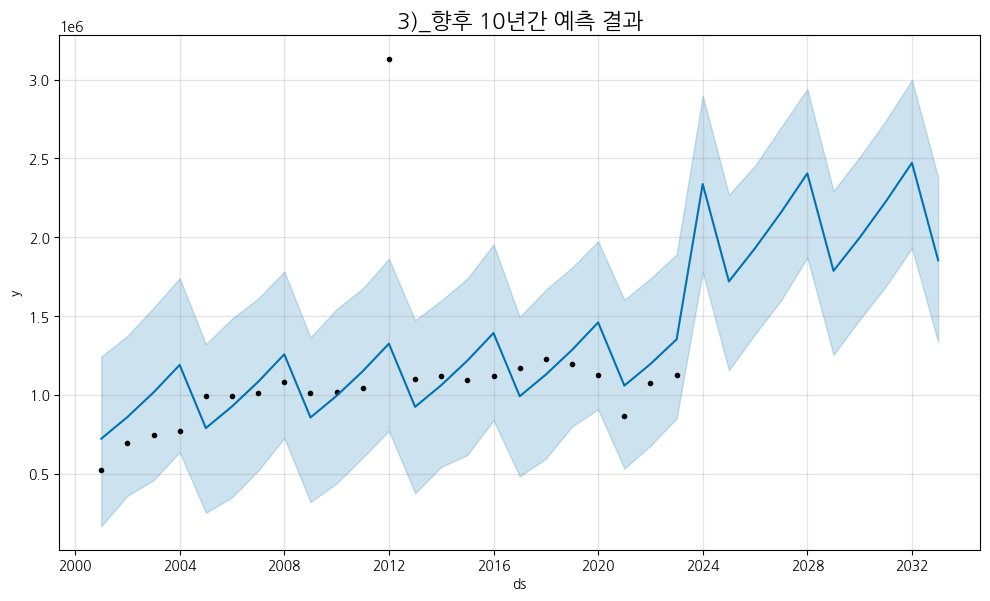

In [31]:
fig1 = m.plot(forecast)

# Prophet이 그려준 첫 번째 subplot에 타이틀 추가
fig1.axes[0].set_title("3)_향후 10년간 예측 결과", fontsize=16)


# 4)_인사이트 및 정책적 시사점
1. 2001년 부터 2023년 까지의 내용을 바탕으로 정리하였다.
2. 인천공항은 계속 우상향하는 그래프를 보여주었고, 그 상승률이 2012년에 피크에 달하였다.
3. 그후 다시 이용객은 전과 같은 이용객 수를 보여준다.
4. 2012년 사건사고를 고려해봤을때 여수 엑스포 때문에 외국인 이용객이 많지 않았을까 유추해본다.
5. 이후 인천공항 뿐만 아니라 엑스포, 월드컵 등 행사가 있을경우 붐빌예정이니 미리미리 대비하는게 좋아보인다.

# 문제_2번

In [32]:
import pandas as pd
file_path = "./ref/부산광역시_방범용CCTV 정보_20230622.csv"
CCTV = pd.read_csv(file_path, encoding="EUC-KR")
CCTV.head(10)

,CCTV 명칭,CCTV 좌표,CCTV 그룹
0,(10차)강서-10-232-1죽동동381가락송산마을(고1),"10.1.11.186:0:0:0:0:0:0,10.1.11.186:9400:",강서-10차
1,(10차)강서-10-232-2죽동동381가락송산마을(고2),"10.1.11.186:0:0:0:0:0:0,10.1.11.186:9400:",강서-10차
2,(10차)강서-10-233-1대저2동3147근린공원(고1),"10.1.11.186:0:0:0:0:0:0,10.1.11.186:9400:",강서-10차
3,(10차)강서-10-233-2대저2동3147근린공원(고2),"10.1.11.186:0:0:0:0:0:0,10.1.11.186:9400:",강서-10차
4,(10차)강서-10-235-2대저2동2041-40덕두시장,"10.1.11.186:0:0:0:0:0:0,10.1.11.186:9400:",강서-10차
5,(10차)강서-10-236-1송정동1731녹산공단대창스틸,"10.1.11.186:0:0:0:0:0:0,10.1.11.186:9400:",강서-10차
6,(10차)강서-10-237-0강동동1064북정마을논길,"10.1.11.186:0:0:0:0:0:0,10.1.11.186:9400:",강서-10차
7,(10차)강서-10-237-1강동동1064북정마을논길,"10.1.11.186:0:0:0:0:0:0,10.1.11.186:9400:",강서-10차
8,(10차)강서-10-236-0송정동1731녹산공단대창스틸,"10.1.11.186:0:0:0:0:0:0,10.1.11.186:9400:",강서-10차
9,(10차)강서-10-235-0대저2동2041-40덕두시장,"10.1.11.186:0:0:0:0:0:0,10.1.11.186:9400:",강서-10차


In [33]:
cctv=CCTV.rename(columns={"CCTV 그룹":"local"})
cctv=cctv['local']
cctv

0        강서-10차
1        강서-10차
2        강서-10차
3        강서-10차
4        강서-10차
         ...   
6100    해운대-폐공가
6101    해운대-폐공가
6102    해운대-폐공가
6103    해운대-폐공가
6104    해운대-폐공가
Name: local, Length: 6105, dtype: object

In [34]:
# 방법 1
cctv = cctv.apply(lambda x: x.split("-")[0])
# 방법 2
# local_list = []
# for v in cctv:
#     local_list.append(v.split("-")[0])
# cctv=pd.Series(local_list)
# 방법3
# cctv = cctv.str.extract(r"(\D+)-")[0]

cctv=cctv.value_counts()
cctv=cctv.reset_index()
cctv

,local,count
0,사하,431
1,사상,422
2,해운대,418
3,동래,404
4,금정,403
5,북구,403
6,진구,395
7,영도,381
8,연제,377
9,동구,374


In [35]:
cctv.sample(10)

,local,count
8,연제,377
4,금정,403
6,진구,395
14,기장,344
11,강서,352
9,동구,374
2,해운대,418
10,수영,365
1,사상,422
13,서구,348


In [36]:
import pandas as pd
import warnings
warnings.simplefilter("ignore",UserWarning)
file_path2="./ref/연령별인구현황_월간.xlsx"
ori =pd.read_excel(file_path2,sheet_name='연령별인구현황',skiprows=3)
ori

,행정기관코드,행정기관,총 인구수,연령구간인구수,0~9세,10~19세,20~29세,30~39세,40~49세,50~59세,...,10~19세.2,20~29세.2,30~39세.2,40~49세.2,50~59세.2,60~69세.2,70~79세.2,80~89세.2,90~99세.2,100세 이상.2
0,2600000000,부산광역시,"3,306,993","3,306,993","200,627","264,771","386,558","393,792","489,807","539,964",...,"128,872","187,837","191,071","242,526","276,337","296,378","172,706","87,000","13,119",384
1,2611000000,부산광역시 중구,"39,311","39,311",931,"1,773","5,638","4,310","4,582","6,423",...,914,"2,964","2,037","2,096","3,078","4,109","2,877","1,532",251,15
2,2614000000,부산광역시 서구,"104,449","104,449","5,060","7,063","12,272","10,400","13,778","16,812",...,"3,447","6,366","5,059","6,730","8,260","10,223","7,044","3,969",632,12
3,2617000000,부산광역시 동구,"86,809","86,809","3,903","4,636","9,480","10,598","11,324","13,941",...,"2,254","4,847","4,991","5,212","6,703","8,376","6,120","3,566",494,10
4,2620000000,부산광역시 영도구,"107,006","107,006","4,364","6,815","10,089","9,716","13,733","17,687",...,"3,324","4,551","4,448","6,540","8,538","11,533","8,255","4,438",601,17
5,2623000000,부산광역시 부산진구,"357,475","357,475","19,405","24,054","49,960","49,256","49,715","55,808",...,"11,921","26,314","24,077","24,451","28,682","31,317","18,484","9,708","1,324",31
6,2626000000,부산광역시 동래구,"272,590","272,590","18,893","25,485","29,383","31,940","43,738","43,823",...,"12,258","14,375","15,878","22,379","22,669","23,413","13,415","6,220",969,28
7,2629000000,부산광역시 남구,"255,786","255,786","14,568","22,340","32,784","26,678","38,448","41,257",...,"10,895","15,450","12,933","19,212","20,859","22,318","14,312","6,963",958,29
8,2632000000,부산광역시 북구,"276,684","276,684","16,736","21,609","31,476","33,069","37,773","49,562",...,"10,432","14,743","15,645","18,731","26,357","26,262","12,752","6,459","1,005",35
9,2635000000,부산광역시 해운대구,"383,355","383,355","24,071","35,804","41,691","42,119","60,575","67,383",...,"17,293","19,949","21,383","31,709","35,383","32,640","18,247","9,638","1,534",48


In [37]:
data=ori[['행정기관','총 인구수']]
data.columns=['local','population']
data=data.loc[1:]
data['local']=data['local'].apply(lambda x:x.replace('부산광역시 ',"").strip())
data=data.reset_index(drop=True) #drop=True는 기존 인덱스를 삭제하고 새롭게 부여
print(data)
print(cctv)

   local population
0     중구     39,311
1     서구    104,449
2     동구     86,809
3    영도구    107,006
4   부산진구    357,475
5    동래구    272,590
6     남구    255,786
7     북구    276,684
8   해운대구    383,355
9    사하구    300,922
10   금정구    218,711
11   강서구    143,052
12   연제구    202,919
13   수영구    175,511
14   사상구    203,029
15   기장군    179,384
   local  count
0     사하    431
1     사상    422
2    해운대    418
3     동래    404
4     금정    403
5     북구    403
6     진구    395
7     영도    381
8     연제    377
9     동구    374
10    수영    365
11    강서    352
12    남구    351
13    서구    348
14    기장    344
15    중구    337


In [38]:
data['local']=data['local'].apply(lambda x:x.replace("구","").replace("군","").replace("부산진","진구").strip() if len(x.strip())>2 else x.strip()) #strip()으로 공백제거

In [39]:
total = pd.merge(cctv, data, on='local')
total['population']= total['population'].str.replace(",","").astype(int)
total=total.sort_values(by="population",ascending=False)
total=total.set_index('local')
type(total)

pandas.core.frame.DataFrame

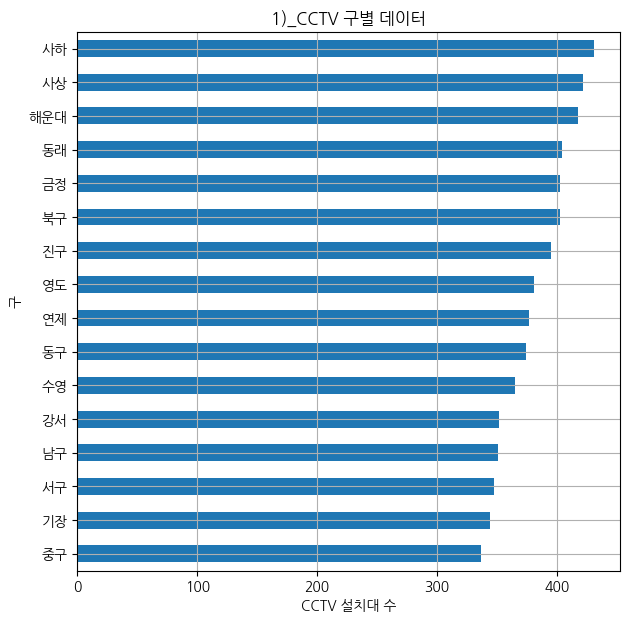

In [41]:
plt.figure()
total['count'].sort_values().plot(kind='barh',grid=True,figsize=(7,7),ylabel='구')

plt.title("1)_CCTV 구별 데이터")
plt.xlabel("CCTV 설치대 수")

plt.show()

[]

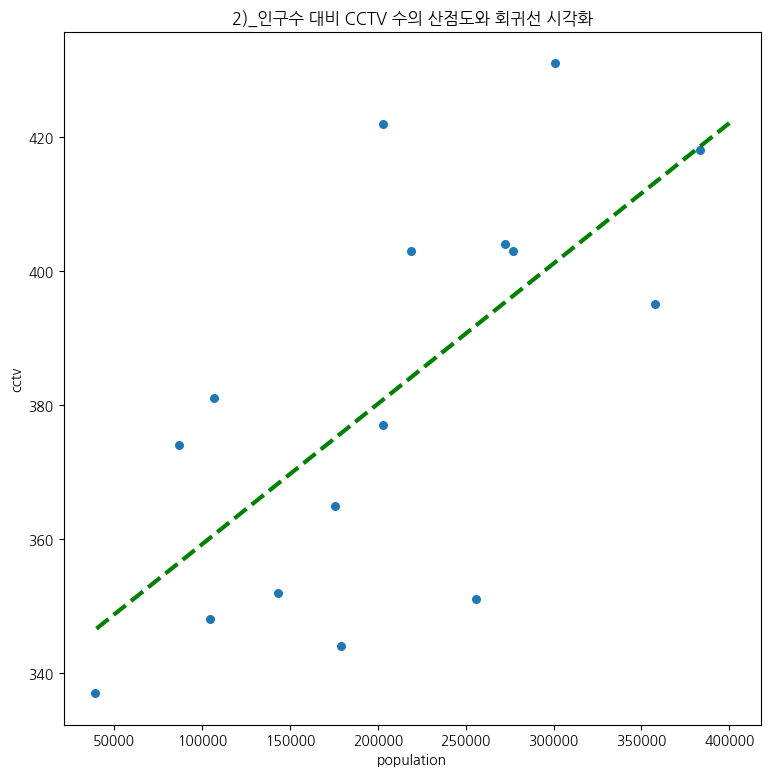

In [45]:
import numpy as np
fp1 = np.polyfit(total['population'],total['count'],1)
f1 = np.poly1d(fp1)
fx = np.linspace(40000,400000,10)
plt.figure(figsize=(9,9))
plt.plot(fx,f1(fx),ls='dashed',lw=3,color='g')
plt.title("2)_인구수 대비 CCTV 수의 산점도와 회귀선 시각화")
plt.scatter(total['population'],total['count'],s=30)

plt.xlabel('population')
plt.ylabel('cctv')

plt.plot()

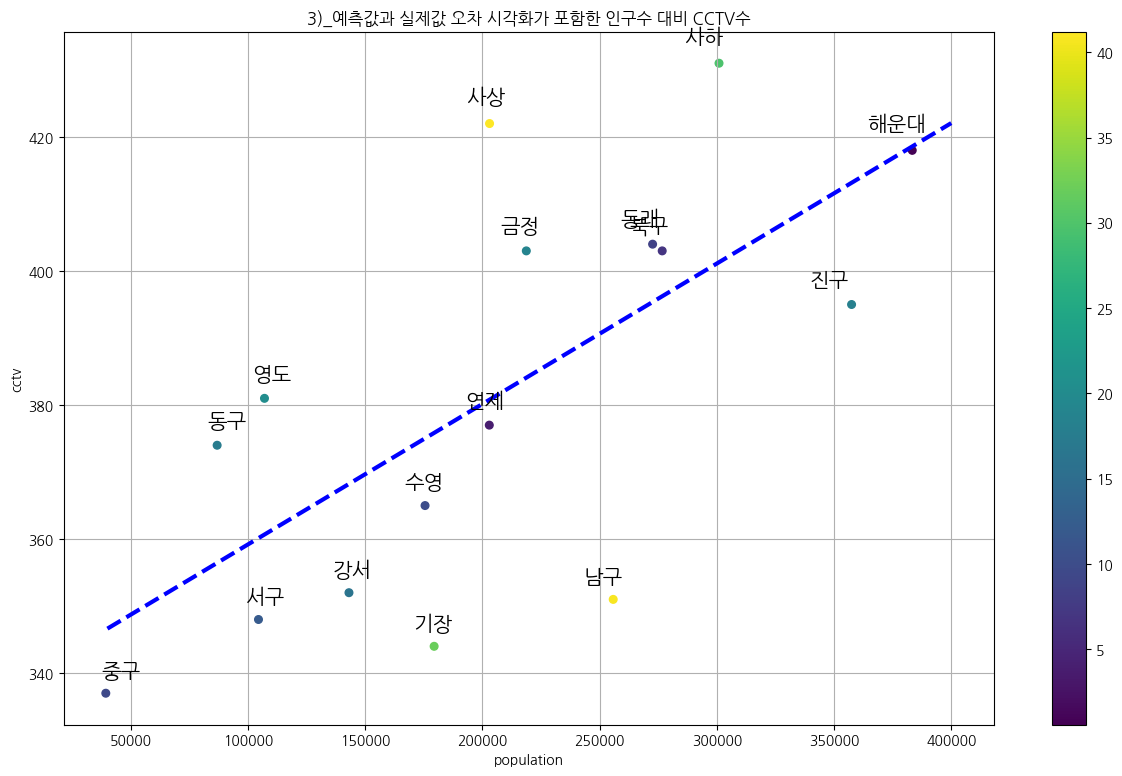

In [49]:
fp1 = np.polyfit(total['population'],total['count'],1)
f1 = np.poly1d(fp1)
fx = np.linspace(40000,400000,10)
plt.figure(figsize=(15,9))
plt.plot(fx,f1(fx),ls='dashed',lw=3,color='b')
plt.title("3)_예측값과 실제값 오차 시각화가 포함한 인구수 대비 CCTV수")

# 오차
total['err']= np.abs(total['count']-f1(total['population']))

plt.scatter(total['population'],total['count'],s=30, c=total['err'])
plt.xlabel('population')
plt.ylabel('cctv')
plt.plot()

# 점마다 각 동의 이름을 부여
for i in range(len(total['population'])):
    plt.text(total['population'].iloc[i]*0.95,total['count'].iloc[i]*1.007,total.index[i],fontsize=15)
plt.grid()
plt.colorbar()
plt.show()

# 4)_ 인사이트 및 정책적 시사점
1. 기대치보다 CCTV가 과하게 설치된 지역으론 사하, 사상, 해운대 가 있고 인구 수 대비 CCTV수가 높게 예측보다 높다.
2. 예측값보다 CCTV가 적게 설치된 지역 중구, 수영, 서구, 남구 가 있다. 인구에 비해 CCTV 수가 현저히 낮음
3. 예측치에 가까운 지역들 연제, 동래, 금정, 진구 예측 치와 거의 유사하다.
4. 저평가 지역 보완 중구, 수영, 서구 등은 인구 대비 설치 부족 — 향후 집중 설치 필요